In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.graphics.regressionplots import influence_plot 
from sklearn import metrics

In [2]:
strength_df = pd.read_csv('linesrReg.csv')
strength_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   S. No.       30 non-null     int64  
 1   Composition  30 non-null     float64
 2   Strength     30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


<Axes: xlabel='Composition', ylabel='Strength'>

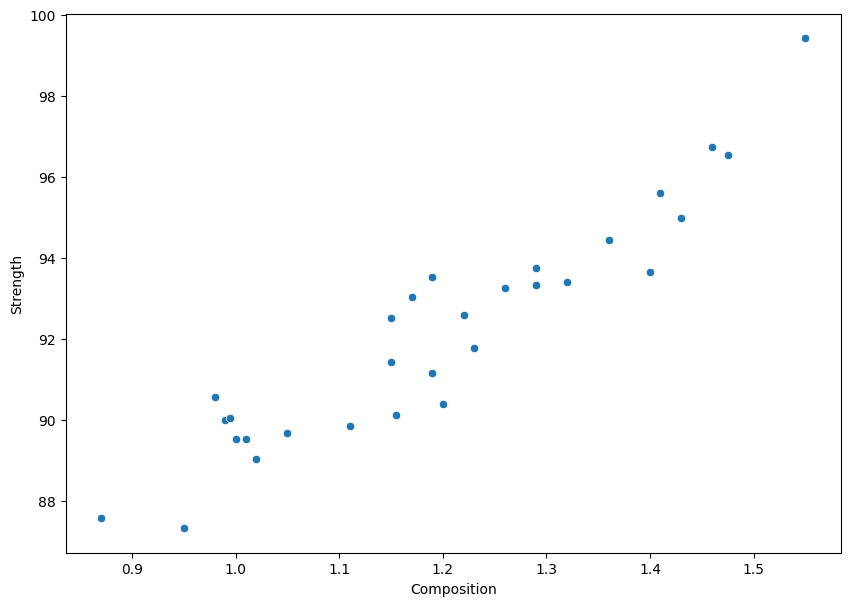

In [3]:
# scatter plot 
plt.figure(figsize=(10,7))
sns.scatterplot(x=strength_df['Composition'],y=strength_df['Strength'])

const          72.559850
Composition    16.547836
dtype: float64
R-squared: 0.8289800762879119


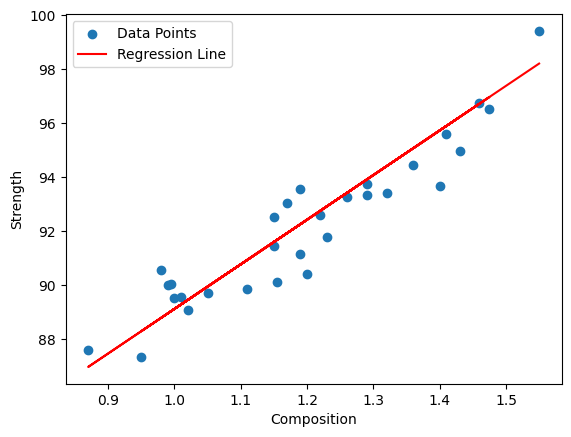

In [5]:
# Preprocessing: add a constant 1 to the dataset
X = sm.add_constant(strength_df['Composition'])
Y = strength_df['Strength']

# Split dataset (60% training, 40% validation)
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.6)

# Fit the regression model and print the model parameters
strength_1rm = sm.OLS(train_Y, train_X).fit()
print(strength_1rm.params)

# Predicting and model validation
pred_Y = strength_1rm.predict(test_X)
r_squared = r2_score(test_Y, pred_Y)
print("R-squared:", r_squared)
plt.scatter(strength_df['Composition'], Y, label="Data Points")
plt.plot(strength_df['Composition'], strength_1rm.predict(X), color='red', label="Regression Line")
plt.xlabel("Composition")
plt.ylabel("Strength")
plt.legend()
plt.show()

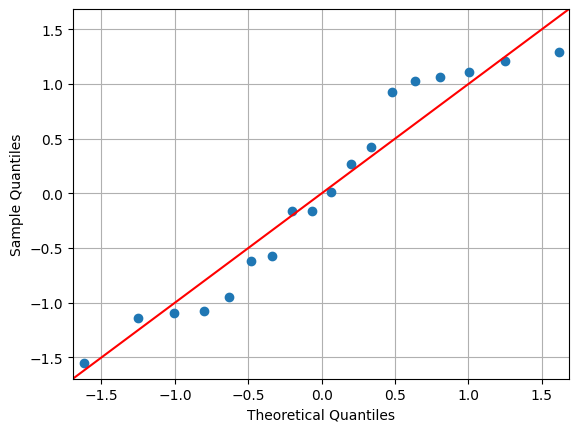

In [7]:
# Residual analysis and probability plot 
fig = sm.qqplot(strength_1rm.resid, line = '45')
plt.grid()
plt.show()



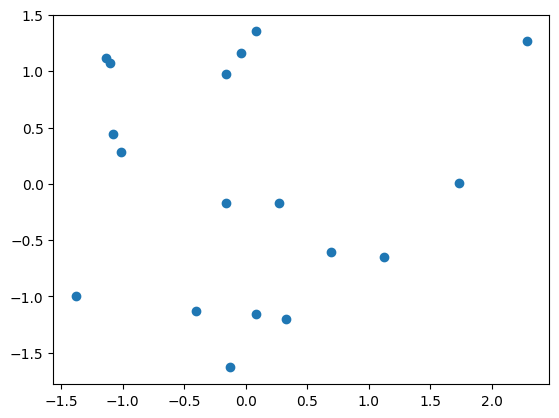

In [9]:
# standardize residual plot 
def standardize(Z):
    return (Z-Z.mean())/Z.std()
plt.scatter(standardize(strength_1rm.fittedvalues),standardize(strength_1rm.resid))

In [11]:
strength_1rm.summary2()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.883   
Dependent Variable: Strength         AIC:                52.2851 
Date:               2023-10-16 10:10 BIC:                54.0658 
No. Observations:   18               Log-Likelihood:     -24.143 
Df Model:           1                F-statistic:        129.6   
Df Residuals:       16               Prob (F-statistic): 4.40e-09
R-squared:          0.890            Scale:              0.96311 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const         72.5599    1.7252  42.0580  0.0000  68.9025  76.2172
Composition   16.5478    1.4537  11.3836  0.0000  13.4662  19.6294
-----------------------------------------------------------------
Omnibus:               5.060        Durbin-Watson:          2.598
Prob(Omnibus):         0.080        Jarque-Bera (JB):       1.493
Skew:                  -0.044       Prob(JB):               0.474
Kurtosis:              1.592        Condition No.:          15   
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [13]:
# when split the data 99 for training and 1 for test
train_X, test_X , train_Y, test_Y = train_test_split(X,Y , train_size = 0.99)
strenght_lrm = sm.OLS(train_Y, train_X).fit()
strength_1rm.summary2()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.883   
Dependent Variable: Strength         AIC:                52.2851 
Date:               2023-10-16 10:17 BIC:                54.0658 
No. Observations:   18               Log-Likelihood:     -24.143 
Df Model:           1                F-statistic:        129.6   
Df Residuals:       16               Prob (F-statistic): 4.40e-09
R-squared:          0.890            Scale:              0.96311 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const         72.5599    1.7252  42.0580  0.0000  68.9025  76.2172
Composition   16.5478    1.4537  11.3836  0.0000  13.4662  19.6294
-----------------------------------------------------------------
Omnibus:               5.060        Durbin-Watson:          2.598
Prob(Omnibus):         0.080        Jarque-Bera (JB):       1.493
Skew:                  -0.044       Prob(JB):               0.474
Kurtosis:              1.592        Condition No.:          15   
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

<Axes: xlabel='beta0', ylabel='Count'>

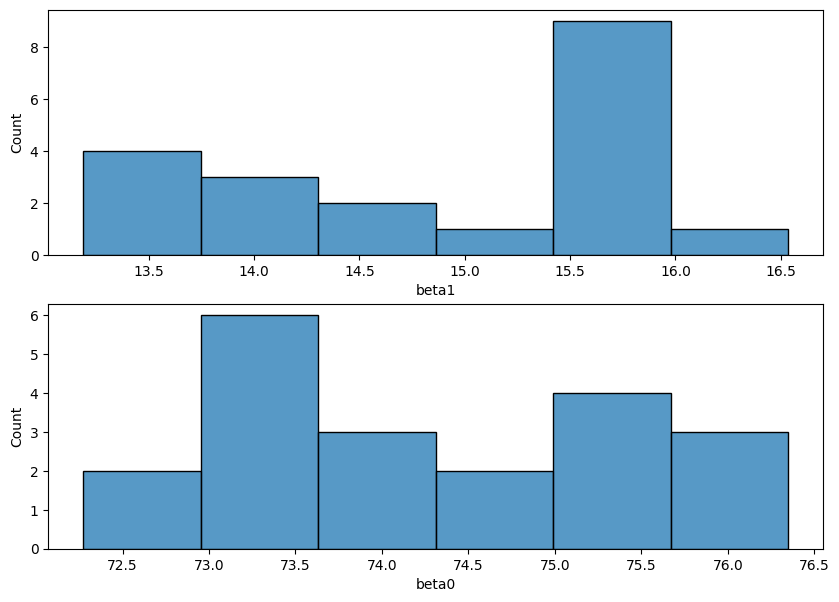

In [14]:
# proff the regression coeffiecient are randaom variabels
beta0 = []
beta1 = []
for i in range (20):
    train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.7)
    strength_lrm = sm.OLS(train_Y, train_X).fit()
    b0 , b1 = strength_lrm.params
    beta0.append(b0)
    beta1.append(b1)
d = {"beta0": beta0, "beta1":beta1}    
beta_df = pd.DataFrame(data = d)
fig, axes = plt.subplots(nrows =2, ncols=1, figsize =(10,7))
sns.histplot(beta_df["beta1"], ax= axes[0])
sns.histplot(beta_df["beta0"], ax = axes[1])


     Comp    PredStr  LowerLimit  UpperLimit  Actual
17  1.170  91.931926   89.470583   94.393270  93.030
21  1.110  91.035896   88.564477   93.507316  89.850
10  1.230  92.827956   90.362944   95.292969  91.770
19  1.010  89.542513   87.024306   92.060721  89.540
14  1.475  96.486745   93.868824   99.104666  96.535
20  0.995  89.318506   86.790141   91.846870  90.050
26  1.290  93.723986   91.241621   96.206351  93.330
3   1.150  91.633250   89.170071   94.096428  91.430
24  1.260  93.275971   90.803980   95.747962  93.250
22  1.200  92.379941   89.918483   94.841400  90.390
23  1.155  91.707919   89.245342   94.170496  90.120
4   1.290  93.723986   91.241621   96.206351  93.740
2   1.000  89.393175   86.868285   91.918065  89.530
25  1.320  94.172001   91.675908   96.668094  93.410
6   1.460  96.262738   93.660152   98.865323  96.730


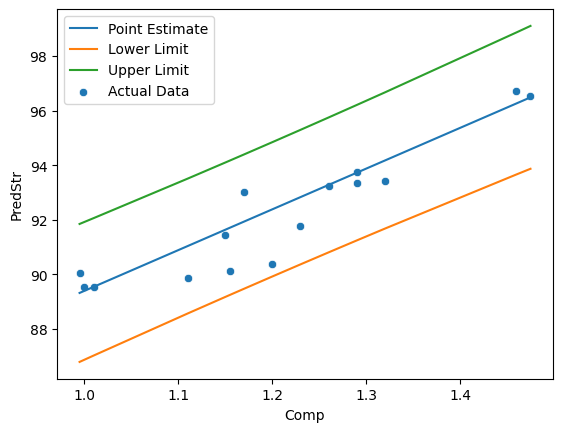

In [17]:
# confidence interval of regression line
# Define your X and Y variables
X = sm.add_constant(strength_df['Composition'])
Y = strength_df['Strength']

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.5, random_state=1)

# Fit the OLS model
strength_model = sm.OLS(train_Y, train_X).fit()

# Predict values
pred_Y = strength_model.predict(test_X)

# Calculate prediction intervals
pred_std, pred_low, pred_high = wls_prediction_std(strength_model, test_X, alpha=0.05)

# Create a DataFrame for predictions
pred_Y_df = pd.DataFrame({'Comp': test_X['Composition'], 'PredStr': pred_Y, 'LowerLimit': pred_low, 'UpperLimit': pred_high, 'Actual': test_Y})

# Print the DataFrame
print(pred_Y_df)

# Create a line plot with seaborn
sns.lineplot(x='Comp', y='PredStr', data=pred_Y_df, label="Point Estimate")
sns.lineplot(x='Comp', y='LowerLimit', data=pred_Y_df, label="Lower Limit")
sns.lineplot(x='Comp', y='UpperLimit', data=pred_Y_df, label="Upper Limit")
sns.scatterplot(x='Comp', y='Actual', data=pred_Y_df, label="Actual Data")

plt.show()


Optimization terminated successfully.
         Current function value: 0.354370
         Iterations 7


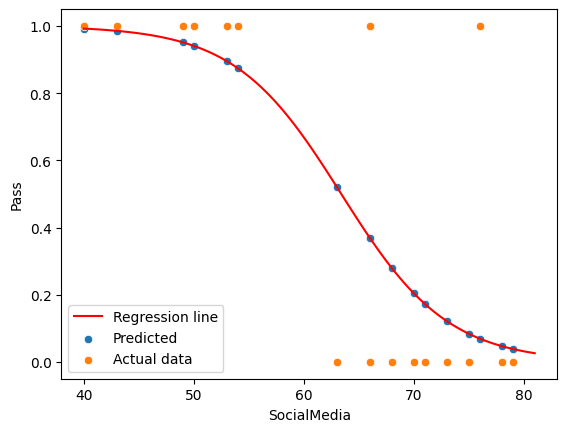

In [20]:
# Binary logistic regression
pass_df = pd.read_csv('logistic.csv')

# Specify your dependent and independent variables
X = sm.add_constant(pass_df['SocialMedia'])  # Adding a constant term for the intercept
Y = pass_df['Pass']

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.4, random_state=34)

# Fit the logistic regression model
pass_logit = sm.Logit(train_Y, train_X).fit()

# Make predictions on the training data
pred_Y = pass_logit.predict(train_X)

# Extract the coefficients (b0 and b1)
b0, b1 = pass_logit.params

# Generate values for the regression line
xval = np.linspace(min(pass_df['SocialMedia']), max(pass_df['SocialMedia']), 100)
yval = 1 / (1 + np.exp(-b0 - b1 * xval))

# Plot the regression line, predicted values, and actual data
sns.lineplot(x=xval, y=yval, color='r', label="Regression line")
sns.scatterplot(x=train_X["SocialMedia"], y=pred_Y, label="Predicted")
sns.scatterplot(x=train_X["SocialMedia"], y=train_Y, label="Actual data")

# Show the plot
plt.xlabel("SocialMedia")
plt.ylabel("Pass")
plt.show()

In [24]:
# multiple regression
import pandas as pd
import statsmodels.api as sm

# Create a DataFrame for your data
data = {
    
    'Y': [24, 32, 35, 25, 45, 24, 27, 37, 42, 35],
    'X1': [8, 11, 10, 8, 15, 9, 8, 11, 12, 10],
    'X2': [110, 120, 550, 295, 250, 100, 300, 400, 500, 540]
}

df = pd.DataFrame(data)

# Add a constant term for the intercept
X = sm.add_constant(df[['X1', 'X2']])
Y = df['Y']

# Fit the multiple regression model
model = sm.OLS(Y, X).fit()

# Get the regression coefficients
coefficients = model.params

# Print the regression coefficients
print(coefficients)

f_statistic = model.fvalue
msr = model.mse_model
mse = model.mse_resid

# Print the regression coefficients, F-statistic, MSR, and MSE
print("Regression Coefficients:")
print(coefficients)
print("\nF-Statistic:", f_statistic)
print("Mean Squares Regression (MSR):", msr)
print("Mean Squared Error (MSE):", mse)

# Display the summary of the regression model
print(model.summary2())







const   -2.182854
X1       2.902262
X2       0.016366
dtype: float64
Regression Coefficients:
const   -2.182854
X1       2.902262
X2       0.016366
dtype: float64

F-Statistic: 194.50213923525493
Mean Squares Regression (MSR): 250.68893762739222
Mean Squared Error (MSE): 1.2888749636022154
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.977   
Dependent Variable: Y                AIC:                33.3497 
Date:               2023-10-16 15:13 BIC:                34.2575 
No. Observations:   10               Log-Likelihood:     -13.675 
Df Model:           2                F-statistic:        194.5   
Df Residuals:       7                Prob (F-statistic): 7.34e-07
R-squared:          0.982            Scale:              1.2889  
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [25]:
# Building a multiple regression using python
House_df = pd.read_csv('HousingData.csv')
X_feature = House_df.columns[0:13]
print(X_feature)
X= sm.add_constant(House_df[X_feature])
Y= House_df["MEDV"]

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.75, random_state= 42)
house_lrm = sm.OLS(train_Y,train_X).fit()
house_lrm.summary2()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.780    
Dependent Variable: MEDV             AIC:                1692.7592
Date:               2023-10-16 15:40 BIC:                1744.3769
No. Observations:   295              Log-Likelihood:     -832.38  
Df Model:           13               F-statistic:        81.04    
Df Residuals:       281              Prob (F-statistic): 6.06e-87 
R-squared:          0.789            Scale:              17.357   
-------------------------------------------------------------------
              Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
-------------------------------------------------------------------
const         34.0916    6.0284   5.6552  0.0000   22.2251  45.9582
CRIM          -0.1187    0.0315  -3.7686  0.0002   -0.1807  -0.0567
ZN             0.0480    0.0158   3.0383  0.0026    0.0169   0.0790
INDUS          0.0165    0.0757   0.2185  0.8272   -0.1325   0.1655
CHAS           1.2854    1.0026   1.2821  0.2009   -0.6882   3.2589
NOX          -16.9912    4.4218  -3.8426  0.0002  -25.6952  -8.2872
RM             4.0877    0.4940   8.2740  0.0000    3.1152   5.0602
AGE           -0.0248    0.0152  -1.6326  0.1037   -0.0547   0.0051
DIS           -1.4947    0.2317  -6.4516  0.0000   -1.9507  -1.0386
RAD            0.2631    0.0752   3.4989  0.0005    0.1151   0.4112
TAX           -0.0140    0.0044  -3.1896  0.0016   -0.0227  -0.0054
PTRATIO       -0.9012    0.1531  -5.8862  0.0000   -1.2025  -0.5998
B              0.0096    0.0029   3.2785  0.0012    0.0038   0.0154
LSTAT         -0.3644    0.0564  -6.4656  0.0000   -0.4753  -0.2534
------------------------------------------------------------------
Omnibus:              90.089       Durbin-Watson:          1.736  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       272.918
Skew:                 1.352        Prob(JB):               0.000  
Kurtosis:             6.859        Condition No.:          15532  
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

<Axes: >

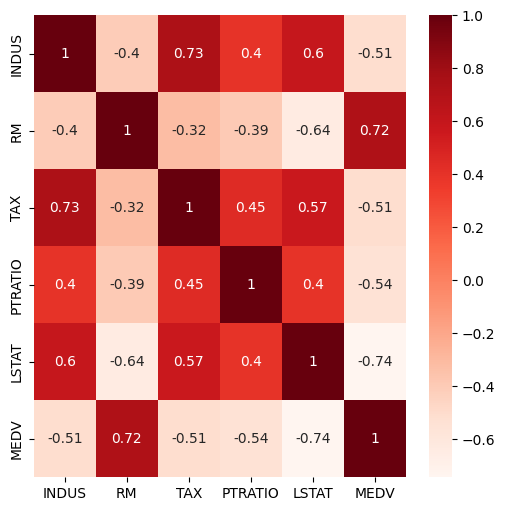

In [26]:
# feaature selection
cols = House_df.columns[0:14]
cor_df = House_df[cols].corr()
# Correlation with target variables 
cor_target = dict(abs(cor_df["MEDV"]))
tgt = list(cor_target.keys())
val = list(cor_target.values())
cor_tgt_dict = {"Target": tgt, "Value":val}
cor_tgt_df = pd.DataFrame(cor_tgt_dict)
features_df = cor_tgt_df[cor_tgt_df["Value"]>0.5]
imp_features= list(features_df["Target"])
cor= House_df[imp_features].corr()
plt.figure(figsize= (6,6))
sns.heatmap(cor, annot= True , cmap = plt.cm.Reds)

In [28]:
X_features = ["LSTAT", "RM", "PTRATIO", "INDUS", "TAX"]
print(X_features)
X= sm.add_constant(House_df[X_features])
Y = House_df["MEDV"]
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.75, random_state= 42)
house_lrm= sm.OLS(train_Y,train_X).fit()
house_lrm.summary2()

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.726    
Dependent Variable: MEDV             AIC:                1748.8486
Date:               2023-10-16 16:05 BIC:                1770.9705
No. Observations:   295              Log-Likelihood:     -868.42  
Df Model:           5                F-statistic:        157.2    
Df Residuals:       289              Prob (F-statistic): 3.05e-80 
R-squared:          0.731            Scale:              21.548   
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      18.9921     4.7493    3.9989   0.0001    9.6445   28.3397
LSTAT      -0.4407     0.0551   -8.0009   0.0000   -0.5492   -0.3323
RM          4.4722     0.5152    8.6799   0.0000    3.4581    5.4863
PTRATIO    -0.8893     0.1464   -6.0762   0.0000   -1.1774   -0.6012
INDUS      -0.0297     0.0648   -0.4581   0.6473   -0.1572    0.0978
TAX        -0.0061     0.0026   -2.3309   0.0204   -0.0112   -0.0009
------------------------------------------------------------------
Omnibus:              89.096       Durbin-Watson:          1.823  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       246.219
Skew:                 1.377        Prob(JB):               0.000  
Kurtosis:             6.527        Condition No.:          7890   
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 7.89e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

['LSTAT', 'RM', 'PTRATIO', 'INDUS']


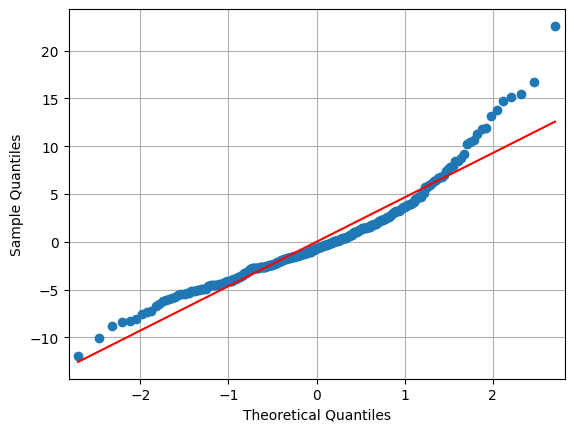

In [27]:
X_features = ["LSTAT", "RM", "PTRATIO", "INDUS"]
print(X_features)
X= sm.add_constant(House_df[X_features])
Y = House_df["MEDV"]
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.75, random_state= 42)
house_lrm= sm.OLS(train_Y,train_X).fit()
house_lrm.summary2()
fig = sm.qqplot(house_lrm.resid, line='s')
plt.grid()

['LSTAT', 'RM', 'PTRATIO', 'INDUS']


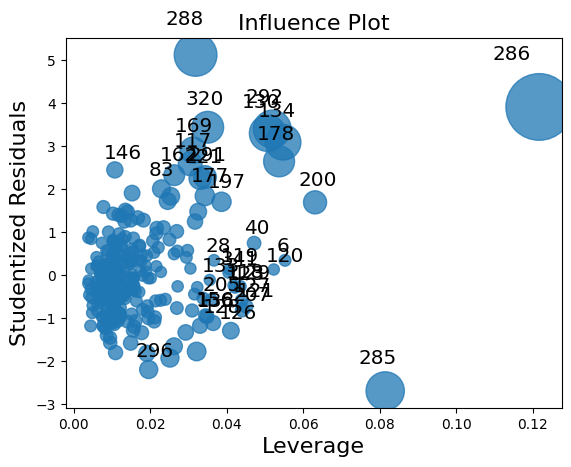

In [31]:
X_features = ["LSTAT", "RM", "PTRATIO", "INDUS"]
print(X_features)
X= sm.add_constant(House_df[X_features])
Y = House_df["MEDV"]
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.75, random_state= 42)
house_lrm= sm.OLS(train_Y,train_X).fit()
influence_plot(house_lrm)
plt.show()

['LSTAT', 'RM', 'PTRATIO', 'INDUS']


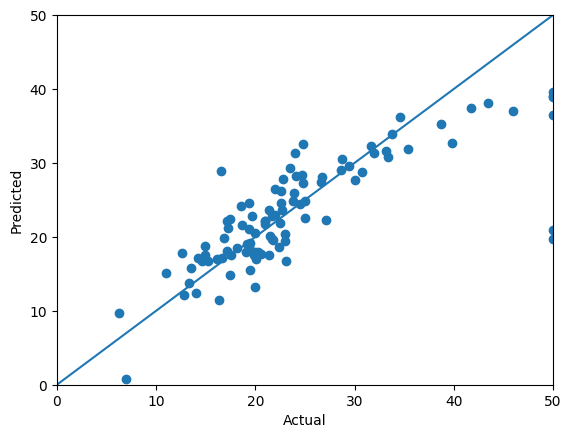

In [32]:
X_features = ["LSTAT", "RM", "PTRATIO", "INDUS"]
print(X_features)
X= sm.add_constant(House_df[X_features])
Y = House_df["MEDV"]
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.75, random_state= 42)
house_lrm= sm.OLS(train_Y,train_X).fit()
# prediction 
pred_Y = house_lrm.predict(test_X)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.xlim(0,50)
plt.ylim(0,50)
plt.scatter(test_Y,pred_Y)
plt.axline((0,0),(1,1))

In [ ]:
# Classification start


In [39]:
# Read the dataset
df = pd.read_csv('index.csv')

# Define your X (independent variables) and Y (dependent variable)
X_features = df.columns[1:21]  # Adjust this range to match your actual independent variables
X = sm.add_constant(df[X_features])
Y = df["Creditability"]

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, random_state=42)

# Fit the logistic regression model
logit = sm.Logit(train_Y, train_X).fit()

# Display the summary
logit_summary = logit.summary2()
print(logit_summary)


Optimization terminated successfully.
         Current function value: 0.475002
         Iterations 7
                                 Results: Logit
Model:                    Logit                 Method:                MLE       
Dependent Variable:       Creditability         Pseudo R-squared:      0.220     
Date:                     2023-10-16 16:24      AIC:                   802.0031  
No. Observations:         800                   BIC:                   900.3800  
Df Model:                 20                    Log-Likelihood:        -380.00   
Df Residuals:             779                   LL-Null:               -486.98   
Converged:                1.0000                LLR p-value:           1.9035e-34
No. Iterations:           7.0000                Scale:                 1.0000    
---------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------

In [44]:
df = pd.read_csv('index.csv')
X_features = ["Account Balance","Duration of Credit (month)","Payment Status of Previous Credit", "Value Savings/Stocks", "Instalment per cent"]
X = sm.add_constant(df[X_features])
Y = df["Creditability"]

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, random_state=42)

# Fit the logistic regression model
logit = sm.Logit(train_Y, train_X).fit()

# Make predictions on the test data
pred_Y = logit.predict(test_X)

# Create a DataFrame to display actual and predicted values
pred_Y_df = pd.DataFrame({
    "Actual": test_Y,
    "Predicted": round(pred_Y)
})

# Print the actual and predicted values
print(pred_Y_df)

Optimization terminated successfully.
         Current function value: 0.498148
         Iterations 6
     Actual  Predicted
521       0        1.0
737       1        1.0
740       1        1.0
660       1        1.0
411       1        1.0
..      ...        ...
408       1        1.0
332       1        1.0
208       1        0.0
613       1        0.0
78        1        1.0

[200 rows x 2 columns]


Optimization terminated successfully.
         Current function value: 0.498148
         Iterations 6
Confusion matrix is: [[ 23  39]
 [ 16 122]]
              precision    recall  f1-score   support

           0       0.59      0.37      0.46        62
           1       0.76      0.88      0.82       138

    accuracy                           0.73       200
   macro avg       0.67      0.63      0.64       200
weighted avg       0.71      0.72      0.70       200



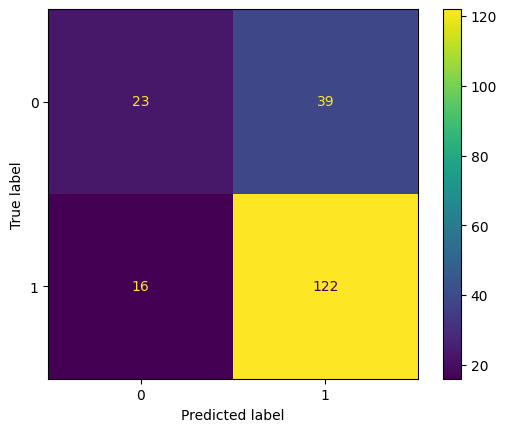

In [48]:
X_features = ["Account Balance","Duration of Credit (month)","Payment Status of Previous Credit","Value Savings/Stocks", "Instalment per cent"]
X = sm.add_constant(df[X_features])
Y = df["Creditability"]

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, random_state=42)

# Fit the logistic regression model
logit = sm.Logit(train_Y, train_X).fit()

# Make predictions on the test data
pred_Y = logit.predict(test_X)

# Create a DataFrame to display actual and predicted values
pred_Y_df = pd.DataFrame({
    "Actual": test_Y,
    "Actual Predicted": pred_Y,
    "Predicted": round(pred_Y)
})

# Calculate confusion matrix
conf_mat = metrics.confusion_matrix(pred_Y_df["Actual"], pred_Y_df["Predicted"])
print("Confusion matrix is:", conf_mat)

# Plot the confusion matrix
cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat)
cm_disp.plot()

# Print classification report
classification_rep = metrics.classification_report(pred_Y_df["Actual"], pred_Y_df["Predicted"])
print(classification_rep)

In [61]:
df = pd.read_csv('group2.csv')

# Define your X (independent variables) and Y (dependent variable)
X_features = df.columns[3:6]  # Adjust this range to match your actual independent variables
X = sm.add_constant(df[X_features])
Y = df["ISF"]

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.99, random_state=42)

# Fit the logistic regression model
logit = sm.Logit(train_Y, train_X).fit()

# Display the summary
logit_summary = logit.summary2()
print(logit_summary)


Optimization terminated successfully.
         Current function value: 0.156807
         Iterations 10
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: ISF              Pseudo R-squared: 0.754     
Date:               2023-10-16 18:14 AIC:              40.9296   
No. Observations:   105              BIC:              51.5454   
Df Model:           3                Log-Likelihood:   -16.465   
Df Residuals:       101              LL-Null:          -66.834   
Converged:          1.0000           LLR p-value:      1.0782e-21
No. Iterations:     10.0000          Scale:            1.0000    
-----------------------------------------------------------------
               Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
-----------------------------------------------------------------
const        -117.4198  34.3834 -3.4150 0.0006 -184.8100 -50.0295
epsilon_d      -0.9796   0.7121 -1.3757 0.1689   -2.3753   0.4160

Optimization terminated successfully.
         Current function value: 0.256493
         Iterations 9
Confusion matrix is: [[11  1]
 [ 2  8]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.89      0.80      0.84        10

    accuracy                           0.86        22
   macro avg       0.87      0.86      0.86        22
weighted avg       0.87      0.86      0.86        22



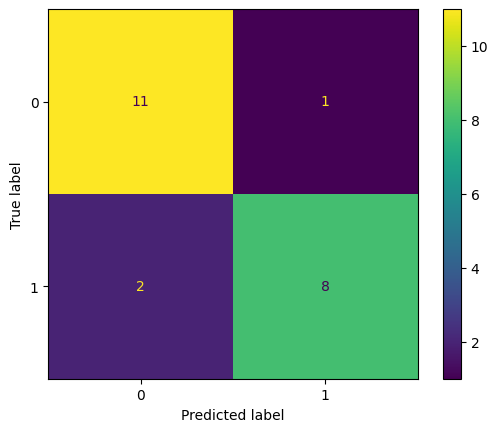

In [52]:
X_features = ["zs"]
X = sm.add_constant(df[X_features])
Y = df["ISF"]

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, random_state=30)

# Fit the logistic regression model
logit = sm.Logit(train_Y, train_X).fit()

# Make predictions on the test data
pred_Y = logit.predict(test_X)

# Create a DataFrame to display actual and predicted values
pred_Y_df = pd.DataFrame({
    "Actual": test_Y,
    "Actual Predicted": pred_Y,
    "Predicted": round(pred_Y)
})

# Calculate confusion matrix
conf_mat = metrics.confusion_matrix(pred_Y_df["Actual"], pred_Y_df["Predicted"])
print("Confusion matrix is:", conf_mat)

# Plot the confusion matrix
cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat)
cm_disp.plot()

# Print classification report
classification_rep = metrics.classification_report(pred_Y_df["Actual"], pred_Y_df["Predicted"])
print(classification_rep)

Optimization terminated successfully.
         Current function value: 0.612558
         Iterations 5
Confusion matrix is: [[12  0]
 [10  0]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        12
           1       0.00      0.00      0.00        10

    accuracy                           0.55        22
   macro avg       0.27      0.50      0.35        22
weighted avg       0.30      0.55      0.39        22



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

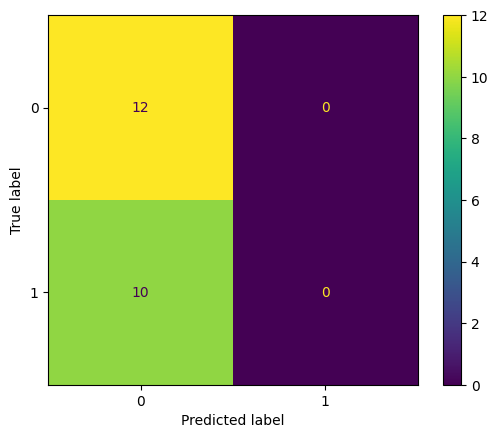

In [56]:
X_features = ["1/r0"]
X = sm.add_constant(df[X_features])
Y = df["ISF"]

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, random_state=30)

# Fit the logistic regression model
logit = sm.Logit(train_Y, train_X).fit()

# Make predictions on the test data
pred_Y = logit.predict(test_X)

# Create a DataFrame to display actual and predicted values
pred_Y_df = pd.DataFrame({
    "Actual": test_Y,
    "Actual Predicted": pred_Y,
    "Predicted": round(pred_Y)
})

# Calculate confusion matrix
conf_mat = metrics.confusion_matrix(pred_Y_df["Actual"], pred_Y_df["Predicted"])
print("Confusion matrix is:", conf_mat)

# Plot the confusion matrix
cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat)
cm_disp.plot()

# Print classification report
classification_rep = metrics.classification_report(pred_Y_df["Actual"], pred_Y_df["Predicted"])
print(classification_rep)

In [58]:
cols = House_df.columns[2:6]
cor_df = House_df[cols].corr()
# Correlation with target variables 
cor_target = dict(abs(cor_Y_df["ISF"]))
tgt = list(cor_target.keys())
val = list(cor_target.values())
cor_tgt_dict = {"Target": tgt, "Value":val}
cor_tgt_df = pd.DataFrame(cor_tgt_dict)
features_df = cor_tgt_df[cor_tgt_df["Value"]>0.5]
imp_features= list(features_df["Target"])
cor= House_df[imp_features].corr()
plt.figure(figsize= (6,6))
sns.heatmap(cor, annot= True , cmap = plt.cm.Reds)

NameError: name 'cor_Y_df' is not defined